# matplotlib API入门

In [1]:
#引入约定
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd

## 图形绘制流程

- （1）创建画布：plt.figure()  
     plt.figure(figsize=(), dpi=)  
     figsize:指定图的长宽  
     dpi:图像的清晰度  
     返回fig对象
- （2）绘制图像：plt.plot(x,y)
- （3）显示图像：plt.show()

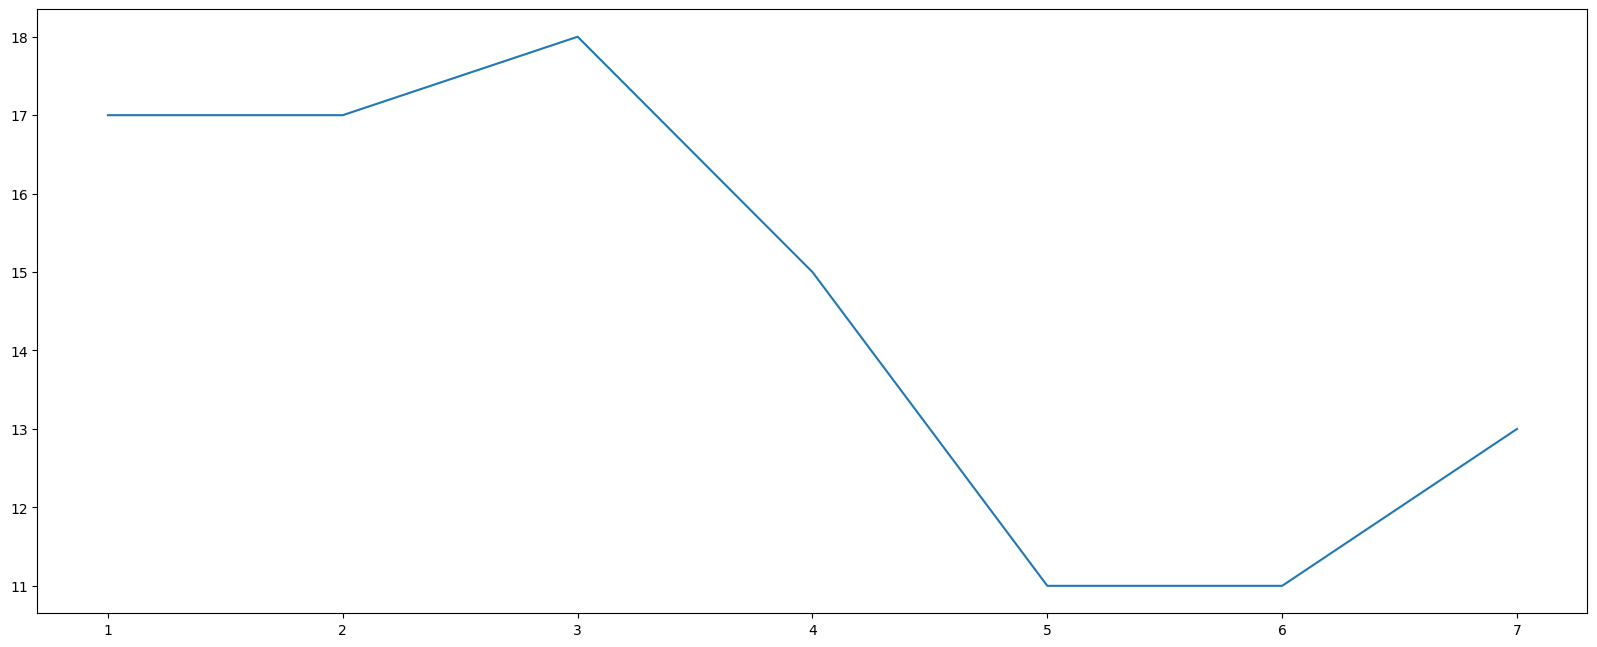

In [2]:
#创建一个简单图形
# 1.创建画布 
plt.figure(figsize=(20, 8), dpi=100) 
# 2.绘制折线图 
plt.plot([1, 2, 3, 4, 5, 6 ,7], [17,17,18,15,11,11,13]) 
# 3.显示图像 
plt.show()

***
## 中文显示问题解决

In [3]:
from pylab import mpl 
# 设置显示中文字体 
mpl.rcParams["font.sans-serif"] = ["SimHei"]
# 设置正常显示符号 
mpl.rcParams["axes.unicode_minus"] = False

***
## 添加自定义x,y刻度

- plt.xticks(x, **kwargs)  
    - x:要显示的刻度值  
- plt.yticks(y, **kwargs)
    - y:要显示的刻度值


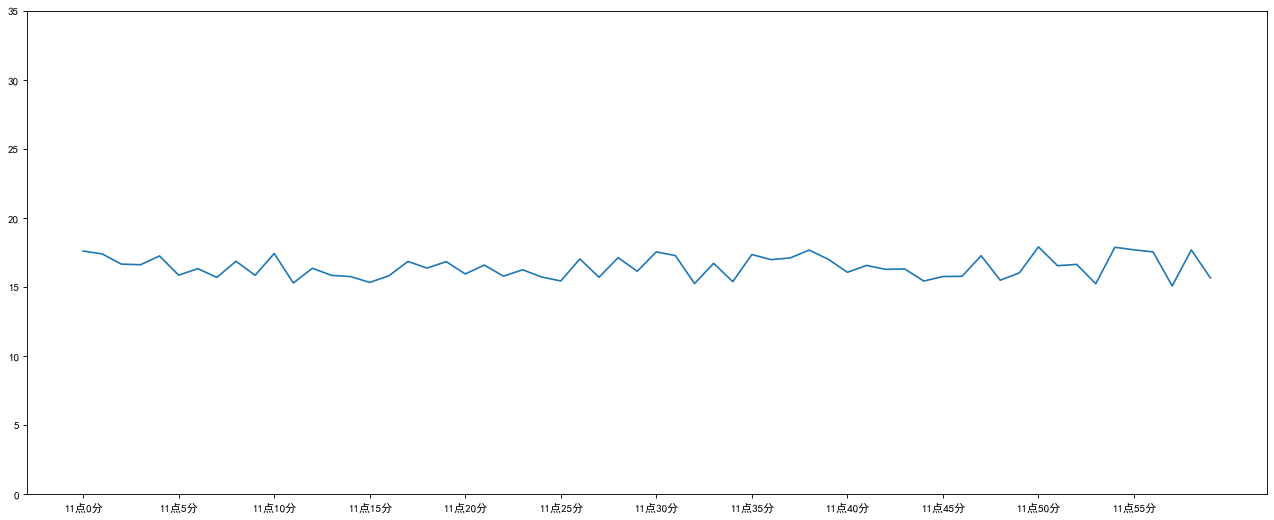

In [4]:
x=range(60)
y=[random.uniform(15,18) for i in x]
# 1.创建画布 
plt.figure(figsize=(20, 8), dpi=80) 
# 2.绘制折线图 
plt.plot(x, y) 

#构造x轴刻度标签
x_ticks_label=["11点{}分".format(i) for i in x]
#构造y轴刻度
y_ticks=range(40)
# 修改x,y轴坐标的刻度显示
plt.xticks(x[::5],x_ticks_label[::5])
plt.yticks(y_ticks[::5])

# 3.显示图像 
plt.show()


***
## 添加网格显示

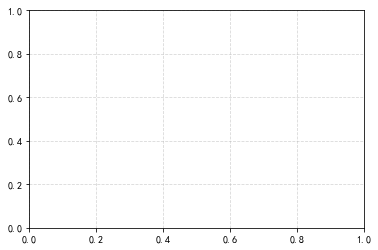

In [24]:
plt.grid(True, linestyle='--', alpha=0.5)

***
## 添加描述信息

Text(0.5, 1.0, '中午11点0分到12点之间的温度变化图示')

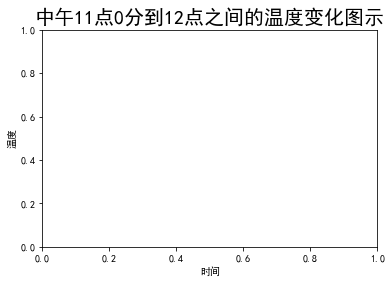

In [25]:
#添加x轴、y轴描述信息及标题
plt.xlabel("时间") 
plt.ylabel("温度") 
plt.title("中午11点0分到12点之间的温度变化图示", fontsize=20)

***
## 图像保存

In [26]:
# 保存图片到指定路径 
plt.savefig("test.png")

<Figure size 432x288 with 0 Axes>

***
## 多个坐标系显示--plt.subplots(面向对象的画图方法)

In [ ]:
#matplotlib.pyplot.subplots(nrows=1, ncols=1, **fig_kw) 创建一个带有多个axes(坐标系/绘图区)的图
#（1）属性
#nrows, ncols : 设置有几行几列坐标系

#（2）返回值
#fig : 图对象 
#axes : 返回相应数量的坐标系

#（3）设置标题等方法不同：
#set_xticks 
#set_yticks 
#set_xlabel 
#set_ylabel

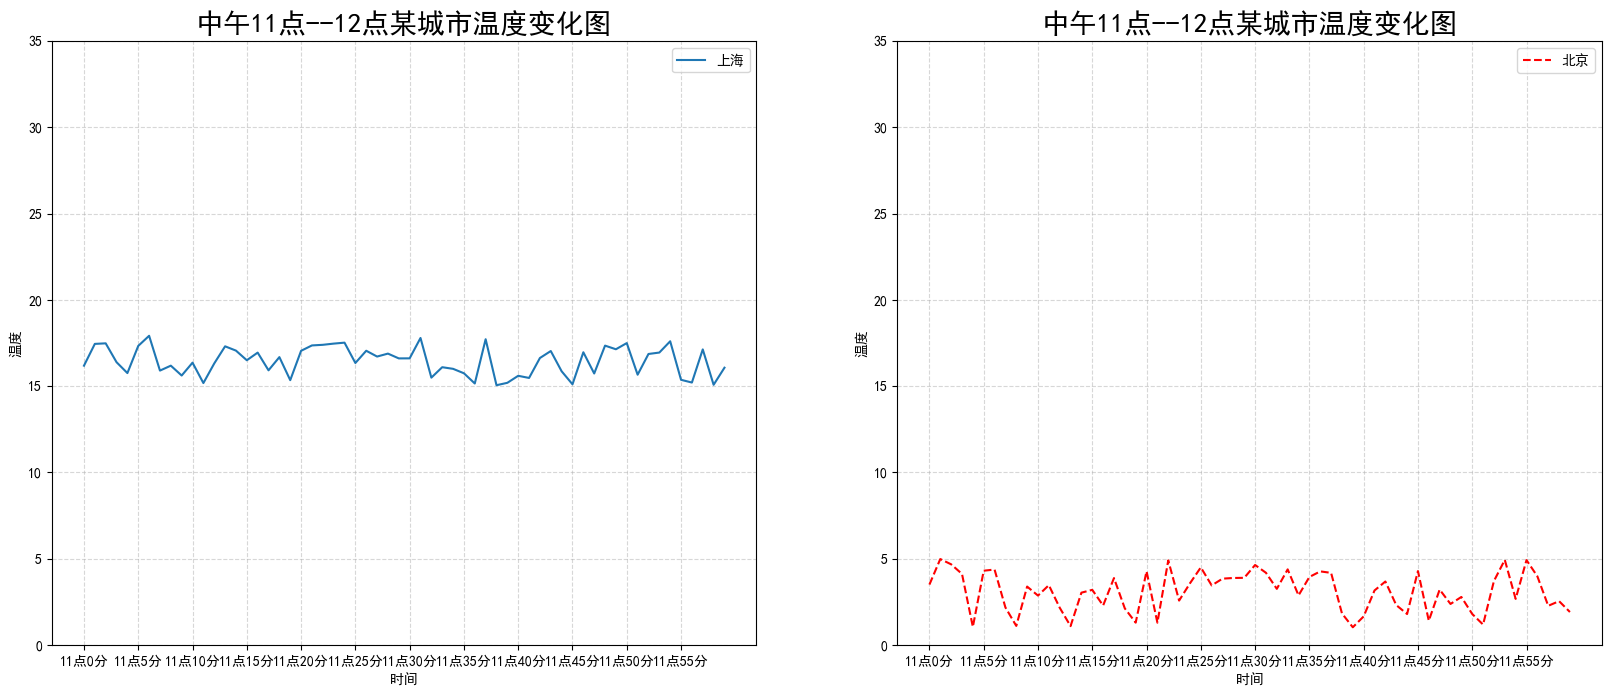

In [27]:
# 0.准备数据
x = range(60)
y_shanghai = [random.uniform(15, 18) for i in x]
y_beijing = [random.uniform(1, 5) for i in x]

# 1.创建画布
# plt.figure(figsize=(20, 8), dpi=100)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8), dpi=100)

# 2.绘制图像
# plt.plot(x, y_shanghai, label="上海")
# plt.plot(x, y_beijing, color="r", linestyle="--", label="北京")
axes[0].plot(x, y_shanghai, label="上海")
axes[1].plot(x, y_beijing, color="r", linestyle="--", label="北京")

# 2.1 添加x,y轴刻度
# 构造x,y轴刻度标签
x_ticks_label = ["11点{}分".format(i) for i in x]
y_ticks = range(40)
# 刻度显示
# plt.xticks(x[::5], x_ticks_label[::5])
# plt.yticks(y_ticks[::5])
axes[0].set_xticks(x[::5])
axes[0].set_yticks(y_ticks[::5])
axes[0].set_xticklabels(x_ticks_label[::5])
axes[1].set_xticks(x[::5])
axes[1].set_yticks(y_ticks[::5])
axes[1].set_xticklabels(x_ticks_label[::5])

# 2.2 添加网格显示
# plt.grid(True, linestyle="--", alpha=0.5)
axes[0].grid(True, linestyle="--", alpha=0.5)
axes[1].grid(True, linestyle="--", alpha=0.5)

# 2.3 添加描述信息
# plt.xlabel("时间")
# plt.ylabel("温度")
# plt.title("中午11点--12点某城市温度变化图", fontsize=20)
axes[0].set_xlabel("时间")
axes[0].set_ylabel("温度")
axes[0].set_title("中午11点--12点某城市温度变化图", fontsize=20)
axes[1].set_xlabel("时间")
axes[1].set_ylabel("温度")
axes[1].set_title("中午11点--12点某城市温度变化图", fontsize=20)

# # 2.4 图像保存
plt.savefig("./test.png")

# # 2.5 添加图例
# plt.legend(loc=0)
axes[0].legend(loc=0)
axes[1].legend(loc=0)

# 3.图像显示
plt.show()

***
## Figure和Subplot

matplotlib的图像都位于Figure对象中。你可以用plt.figure创建一个新的Figure：

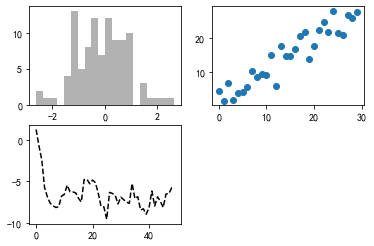

In [5]:
fig = plt.figure()
#然后在这个Figure对象中添加一些小图形
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
#如果这时执行一条绘图命令,matplotlib就会在最后一个用过的subplot（如果没有则创建一个）上进行绘制
plt.plot(np.random.randn(50).cumsum(), 'k--')
#"k--"是一个线型选项，用于告诉matplotlib绘制黑色虚线图。

#你可以在matplotlib的文档中找到各种图表类型
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

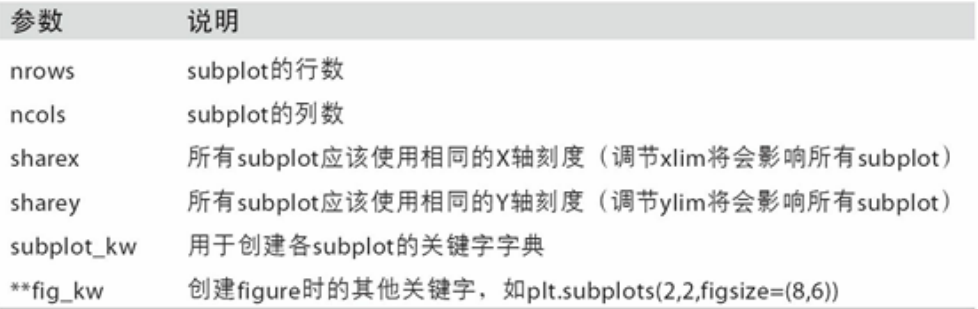

***

## 调整subplot周围的间距（subplots_adjust）

&emsp;&emsp;默认情况下，matplotlib会在subplot外围留下一定的边距，并在subplot之间留下一定的间距。间距跟图像的高度和宽度有关，因此，如果你调整了图像大小（不管是编程还是手工），间距也会自动调整。利用Figure的subplots_adjust方法可以轻而易举地修改间距，此外，它也是个顶级函数

subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
- wspace和hspace用于控制宽度和高度的百分比，可以用作subplot之间的间距。

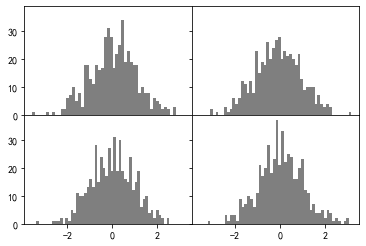

In [6]:
#创建一个新的Figure，并返回一个含有已创建的subplot对象的NumPy数组(axes是NumPy数组)
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
#sharex和sharey表示使用相同刻度发x和y轴


for i in range(2):
   for j in range(2):
    axes[i,j].hist(np.random.randn(500),bins=50,color='k', alpha=0.5)
#调整subplot之间的间距
plt.subplots_adjust(wspace=0,hspace=0)
#轴标签重叠了

***

## 颜色、标记和线型

根据x和y绘制绿色虚线:  
ax.plot(x, y, 'g--')  或  ax.plot(x, y, linestyle='--', color='g')

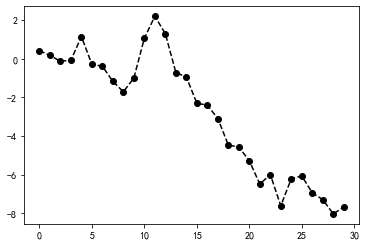

In [7]:
from numpy.random import randn
plt.plot(randn(30).cumsum(), 'ko--')

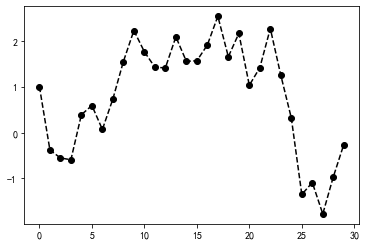

In [8]:
#将其写成更为明确的形式
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

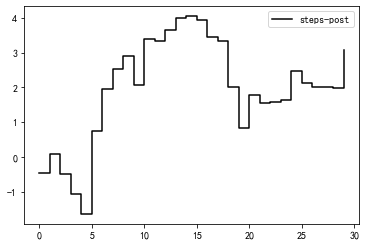

In [9]:
#通过drawstyle选项改变线型
data = np.random.randn(30).cumsum()
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
#你必须调用plt.legend（或使用ax.legend，如果引用了轴的话）来创建图例，无论你绘图时是否传递label标签选项
plt.legend(loc='best')
#label表示图例

***

## 刻度、标签和图例

### 刻度

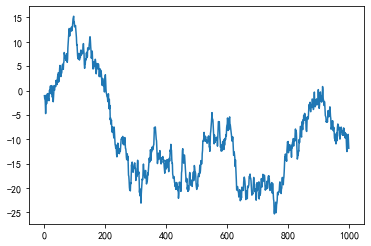

In [10]:
#创建一个简单的图像并绘制一段随机漫步
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

Text(0.5, 0, 'Stages')

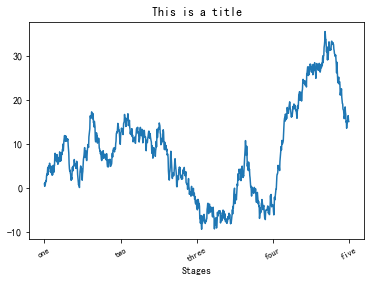

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

#set_xticks告诉matplotlib要将刻度放在数据范围中的哪些位置
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
#set_xticklabels将任何其他的值用作标签
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],rotation=30, fontsize='small')
#rotation选项设定x刻度标签倾斜30度
#fontsize字体大小

#标题
ax.set_title('This is a title')
#为X轴设置一个名称
ax.set_xlabel('Stages')
#注意：Y轴的修改方式与此类似，只需将上述代码中的x替换为y即可。

### 图例

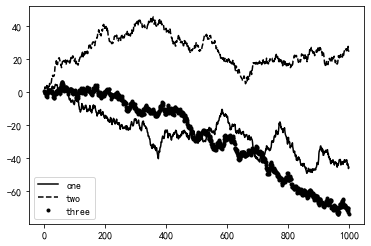

In [12]:
#图例（legend）是另一种用于标识图表元素的重要工具。
from numpy.random import randn
fig = plt.figure(); 
ax = fig.add_subplot(1, 1, 1)
#曲线1
ax.plot(randn(1000).cumsum(), 'k', label='one')
#曲线2
ax.plot(randn(1000).cumsum(), 'k--', label='two')
#曲线3
ax.plot(randn(1000).cumsum(), 'k.', label='three')
#调用ax.legend()或plt.legend()来自动创建图例
ax.legend(loc='best')
#loc告诉matplotlib要将图例放在哪,"best"是不错的选择，因为它会选择最不碍事的位置

***

## 注解以及在Subplot上绘图

除标准的绘图类型，你可能还希望绘制一些子集的注解，可能是文本、箭头或其他图形等。注解和文字可以通过text、arrow和annotate函数进行添加。

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

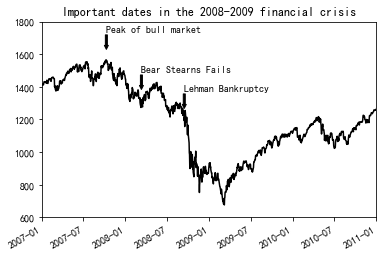

In [13]:
from datetime import datetime
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
data=pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
spx=data['SPX']
spx.plot(ax=ax, style='k-')
crisis_data = [
 (datetime(2007, 10, 11), 'Peak of bull market'),
 (datetime(2008, 3, 12), 'Bear Stearns Fails'),
 (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]
#ax.annotate方法可以在指定的x和y坐标轴绘制标签。
for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
        xytext=(date, spx.asof(date) + 225),
        arrowprops=dict(facecolor='black', headwidth=4, width=2,
                        headlength=4),
        horizontalalignment='left', verticalalignment='top')
#x和y轴范围，并提上标题
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])
ax.set_title('Important dates in the 2008-2009 financial crisis')

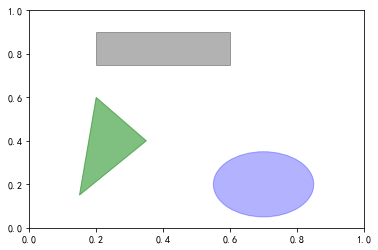

In [14]:
#绘图
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                    color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

***

## 将图表保存到文件

利用plt.savefig可以将当前图表保存到文件。该方法相当于Figure对象的实例方法savefig。例如，要将图表保存为SVG文件，你只需输入：  
- plt.savefig('figpath.svg')

在发布图片时最常用到两个重要的选项：
- dpi：控制“每英寸点数”分辨率
- bbox_inches：可以剪除当前图表周围的空白部分

得到一张带有最小白边且分辨率为400DPI的PNG图片：  
- plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

***

## 使用pandas和seaborn绘图

### 线型图

Series和DataFrame都有一个用于生成各类图表的plot方法。默认情况下，它们所生成的是线型图。

<AxesSubplot:>

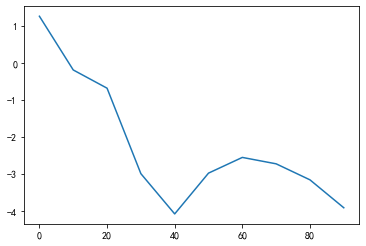

In [15]:
#Series
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

该Series对象的索引会被传给matplotlib，并用以绘制X轴。可以通过use_index=False禁用该功能。X轴的刻度和界限可以通过xticks和xlim选项进行调节，Y轴就用yticks和ylim。plot参数的完整列表如下：
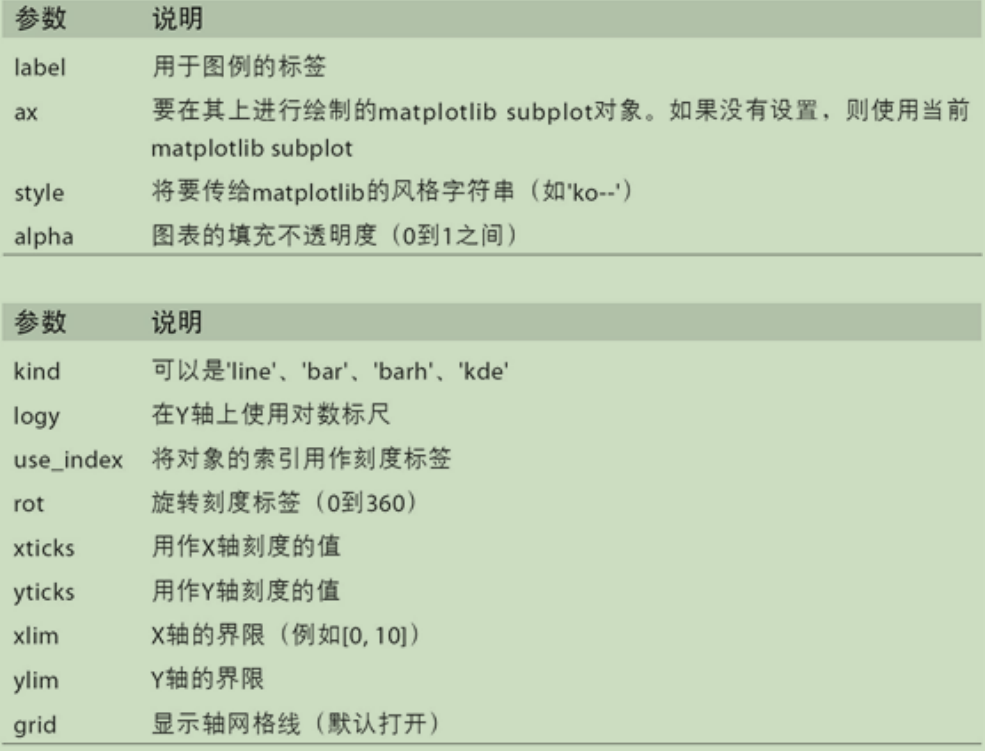

<AxesSubplot:>

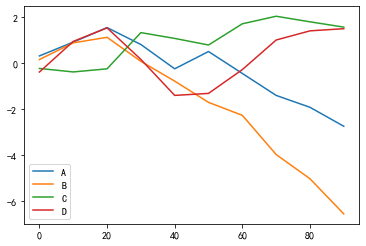

In [16]:
#DataFrame
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                    columns=['A', 'B', 'C', 'D'],
                    index=np.arange(0, 100, 10))
df.plot()
#df.plot()等价于df.plot.line()

### 柱状图

plot.bar()和plot.barh()分别绘制水平和垂直的柱状图。这时，Series和DataFrame的索引将会被用作X（bar）或Y（barh）刻度。

<AxesSubplot:>

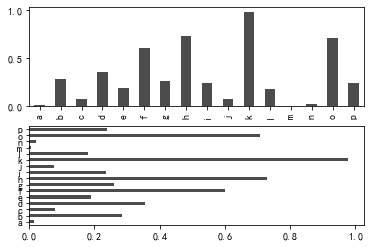

In [17]:
#Series
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
#柱状图1
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
#柱状图2
data.plot.barh(ax=axes[1], color='k', alpha=0.7)
#color='k'和alpha=0.7设定了图形的颜色为黑色，并使用部分的填充透明度

In [18]:
#DataFrame
df = pd.DataFrame(np.random.rand(6, 4),
                index=['one', 'two', 'three', 'four', 'five', 'six'],
                columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
#注意：DataFrame各列的名称"Genus"被用作了图例的标题
df

Genus,A,B,C,D
one,0.220775,0.368961,0.761547,0.779765
two,0.293720,0.565989,0.258001,0.115346
three,0.280644,0.663751,0.177574,0.975148
four,0.966476,0.733292,0.507310,0.752147
five,0.000832,0.317369,0.091101,0.284097
six,0.504190,0.181984,0.800542,0.827178


<AxesSubplot:>

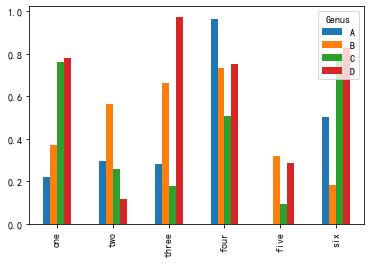

In [19]:
df.plot.bar()

<AxesSubplot:>

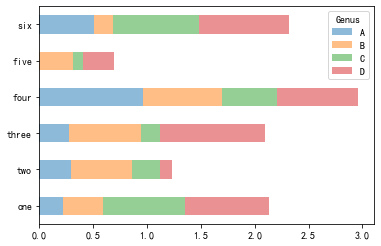

In [20]:
#设置stacked=True即可为DataFrame生成堆积柱状图
df.plot.barh(stacked=True, alpha=0.5)
#alpha是透明度

### 直方图和密度图

In [21]:
tips = pd.read_csv('examples/tips.csv')
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,0.256166
240,27.18,2.00,Yes,Sat,Dinner,2,0.079428
241,22.67,2.00,Yes,Sat,Dinner,2,0.096759
242,17.82,1.75,No,Sat,Dinner,2,0.108899


<AxesSubplot:ylabel='Frequency'>

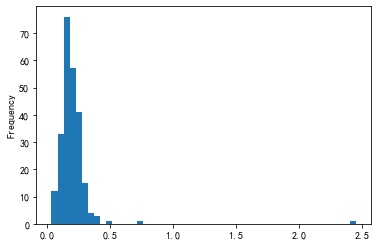

In [22]:
#直方图
tips['tip_pct'].plot.hist(bins=50)

<AxesSubplot:ylabel='Density'>

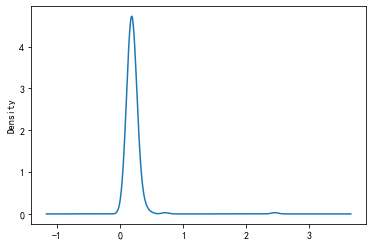

In [23]:
#密度图
tips['tip_pct'].plot.density()

***
## 常见图形绘制

- 折线图：plt.plot()
- 散点图：plt.scatter()
- 柱状图：plt.bar(x,width,align="center")
- 直方图：plt.hist(x,bins)
- 饼图：plt.pie(x,labels,autopct,colors)

***
## Seaborn---绘制统计图形

In [3]:
#导入
import seaborn as sns
import numpy as np

### 可视化数据分布
- 对于单变量数据来说，采用直方图或核密度曲线是个不错的选择
- 对于双变量来说，可采用多面板图形展示，比如散点图、二维直方图和核密度估计图形等

### 绘制单变量分布
seaborn.distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, color=None)
- a:表示要观察的数据，可以是Series、一维数组或列表
- bins：用于控制条形的数量
- hist：接受布尔类型，表示是否绘制直方图
- kde：接受布尔类型，表示是否绘制高斯核密度估计曲线
- rug：接受布尔类型，表示是否在支持的轴方向上绘制rugplot

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


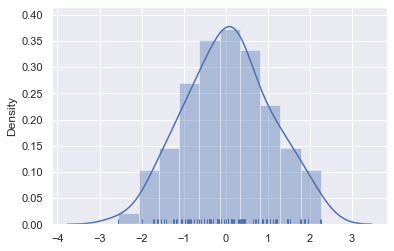

In [4]:
#获取默认绘图
sns.set()
#确定随机生成种子，如果不使用，每次生成图形不一样
np.random.seed(0)
#生成随机数组
arr=np.random.randn(100)
#绘制直方图
ax=sns.distplot(arr,bins=10,hist=True,kde=True,rug=True)

- 直方图有10个条柱，每个柱子的颜色是蓝色
- 曲线为核密度估计曲线
- 核密度估计是概率论中用来估计未知的密度函数，属于非参数检验方法之一，可以直观地看出数据的分布特征

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

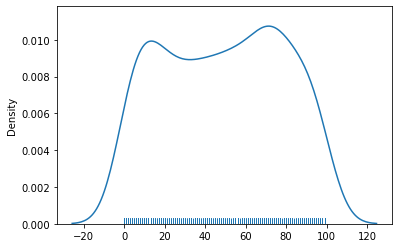

In [4]:
#通过 distplot()函数绘制核密度估计曲线
#（1）创建包含500个位于[0,100]之间整数的随机数组
array_random=np.random.randint(0,100,500)
#(2)绘制核密度估计曲线
sns.distplot(array_random,hist=False,rug=True)

***
### 绘制双变量分布

&emsp;&emsp;两个变量的二元分布可视化也很有用。在 Seaborn中最简单的方法是使用 jointplot()函数，该函数可以创建一个多面板图形，比如散点图、二 维直方图、核密度估计等，以显示两个变量之间的双变量关系及每个变量在单坐标轴上的单变量分布。  
语法如下：  
seaborn.jointplot(x, y, data=None, kind='scatter', stat_func=None, color=None, ratio=5, space=0.2, dropna=True)

- (1) kind：表示绘制图形的类型。 
- (2) stat_func：用于计算有关关系的统计量并标注图。 
- (3) color：表示绘图元素的颜色。 
- (4) size：用于设置图的大小(正方形)。 
- (5) ratio：表示中心图与侧边图的比例。该参数的值越大，则中心图的占比会越大。 
- (6) space：用于设置中心图与侧边图的间隔大小。

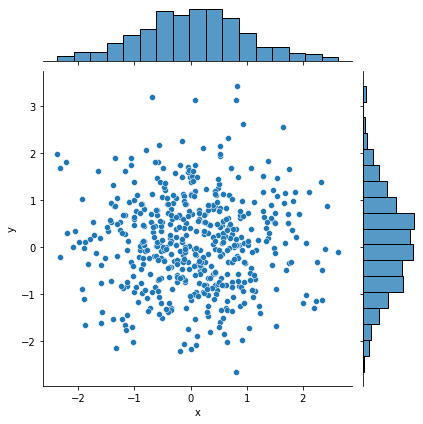

In [5]:
#绘制散点图

#（1）创建DataFrame对象
df=pd.DataFrame({"x": np.random.randn(500),"y": np.random.randn(500)})
#（2）绘制散点图
sns.jointplot(x='x',y='y',data=df)
#因为默认是散点图，故kind没设置

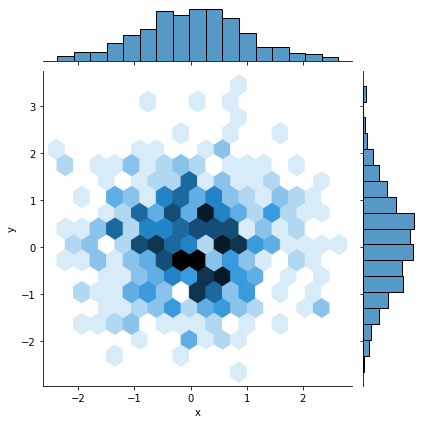

In [6]:
# 绘制二维直方图

sns.jointplot(x="x",y="y",data=df,kind="hex")

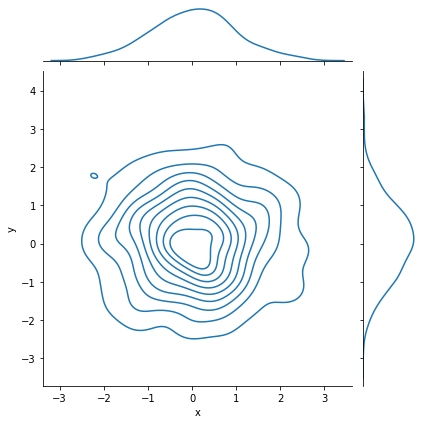

In [7]:
#绘制核密度估计图形
sns.jointplot(x="x",y="y",data=df,kind="kde")

In [10]:
#绘制成对的双变量分布
#加载seaborn中的数据集
dataset=sns.load_dataset("iris")
dataset.head()

URLError: <urlopen error [WinError 10060] 由于连接方在一段时间后没有正确答复或连接的主机没有反应，连接尝试失败。>

In [ ]:
# 绘制多个成对的双变量分布 
sns.pairplot(dataset)